In [1]:
import boto3
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [157]:
from sklearn import  linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,f1_score
from sklearn.naive_bayes import GaussianNB

In [107]:
def acc(predict,y_test):
    count=0
    for i in range (len(predict)):
        if predict[i]==y_test.iloc[i]:
            count+=1

    return(count/len(predict))

In [67]:
def norma(data):
    data['time'] = (data['time'] - data['time'].mean())/data['time'].std(ddof=0)
    data['co2'] = (data['co2'] - data['co2'].mean())/data['co2'].std(ddof=0)
    data['delay'] = (data['delay'] - data['delay'].mean())/data['delay'].std(ddof=0)
    data['m1'] = (data['m1'] - data['m1'].mean())/data['m1'].std(ddof=0)
    data['m2'] = (data['m2'] - data['m2'].mean())/data['m2'].std(ddof=0)
    data['m3'] = (data['m3'] - data['m3'].mean())/data['m3'].std(ddof=0)
    data['temp'] = (data['temp'] - data['temp'].mean())/data['temp'].std(ddof=0)

In [9]:
######it's key of ys3152
dynamodb = boto3.resource('dynamodb',
    aws_access_key_id='',
    aws_secret_access_key='',
    region_name='us-east-1')
table = dynamodb.Table('iotfinal')

item=table.scan()['Items']

#print(item['Items'][0]['temp'])
'''
for entry in item:
    print (entry['time'])
    
'''

"\nfor entry in item:\n    print (entry['time'])\n    \n"

In [10]:


with open('data.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['time','co2','delay','m1','m2','m3','temp','people'])
    for entry in item:
        #print (entry['time'])
        writer.writerow([entry['time'],entry['Co2 concentration(ppm)'],entry['delay'],entry['microphone1'],entry['microphone2'],entry['microphone3'],entry['temp'],entry['people']])
    

In [115]:
data = pd.read_csv("data.csv") 


In [33]:
sum(data['people']>=10)/data['people'].size
#data[data['people']>=10]

0.41446028513238287

In [54]:
print(data.loc[(data['people']>=15)].size)
print(data.loc[(data['people']>=10) & (data['people']<15)].size)
print(data.loc[(data['people']>=5) & (data['people']<10)].size)
print(data.loc[(data['people']<5) ].size)
print(data['time'].size)

928
2328
2744
1856
982


In [7]:
print(data.loc[(data['people']>=15) ]['co2'].mean())
print(data.loc[(data['people']>=10) & (data['people']<15)]['co2'].mean())
print(data.loc[(data['people']>=5) & (data['people']<10)]['co2'].mean())
print(data.loc[(data['people']<5) ]['co2'].mean())

821.9913793103449
704.5738831615121
629.8600583090379
571.2025862068965


In [8]:
print(data.loc[(data['people']>=15) ]['delay'].mean())
print(data.loc[(data['people']>=10) & (data['people']<15)]['delay'].mean())
print(data.loc[(data['people']>=5) & (data['people']<10)]['delay'].mean())
print(data.loc[(data['people']<5) ]['delay'].mean())

7.801058374602219
7.050691027821544
7.087725453057025
6.371622455531154


In [9]:
print(data.loc[(data['people']>=15) ]['m1'].mean())
print(data.loc[(data['people']>=10) & (data['people']<15)]['m1'].mean())
print(data.loc[(data['people']>=5) & (data['people']<10)]['m1'].mean())
print(data.loc[(data['people']<5) ]['m1'].mean())
print('--------')
print(data.loc[(data['people']>=10) ]['m1'].mean())

print(data.loc[(data['people']<10) ]['m1'].mean())


138.99137931034483
143.51202749140893
148.71720116618076
152.28879310344828
--------
142.22358722358723
150.15826086956523


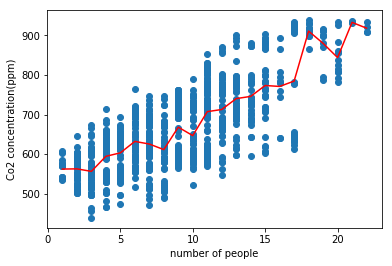

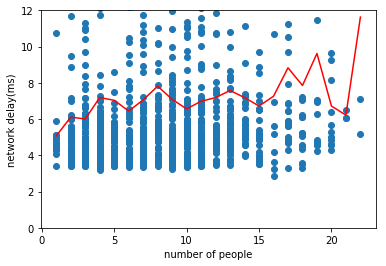

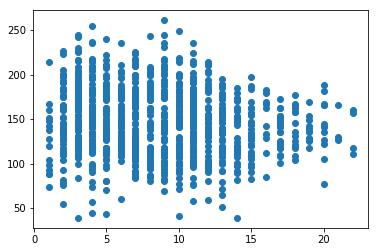

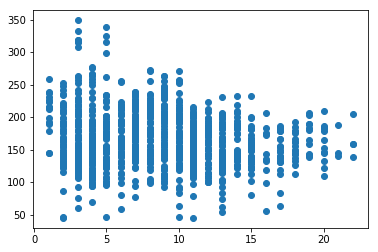

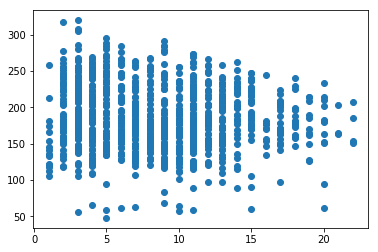

In [37]:



plt.figure(1)
co2p=data.groupby('people').mean()['co2']
plt.scatter(data['people'],data['co2'])
plt.plot(np.arange(1,23),co2p,'r')
plt.ylabel("Co2 concentration(ppm)")
plt.xlabel("number of people")
plt.figure(2)
delp=data.groupby('people').mean()['delay']
plt.scatter(data['people'],data['delay'])
plt.plot(np.arange(1,23),delp,'r')
plt.xlabel("number of people")
plt.ylabel("network delay(ms)")
plt.ylim((0,12))
#plt.yticks(np.arange(0, 10, 1)) 
plt.figure(3)
plt.scatter(data['people'],data['m1'])

plt.figure(4)
plt.scatter(data['people'],data['m2'])

plt.figure(5)
plt.scatter(data['people'],data['m3'])


plt.show()

[[  2.08333333  12.        ]
 [  3.          12.        ]
 [  2.42857143   7.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  1.           6.        ]
 [  2.58333333  12.        ]
 [  3.72727273  11.        ]
 [  3.71428571  21.        ]
 [  3.59090909  44.        ]
 [  3.74242424  66.        ]
 [  5.921875    64.        ]
 [  7.48        75.        ]
 [ 11.94308943 123.        ]
 [ 10.31958763  97.        ]
 [ 13.12987013 154.        ]
 [  8.96610169 118.        ]
 [  8.12        75.        ]
 [  9.1025641   39.        ]
 [  9.85185185  27.        ]
 [ 10.09090909  11.        ]
 [  4.875        8.        ]]


Text(0, 0.5, 'average number of students')

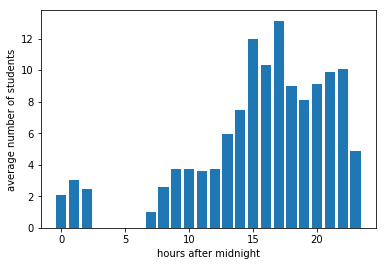

In [38]:
hour=np.zeros((24,2))
for i in range(len(data)):
    row=data.loc[i]
    hour[int(int(row['time'])%10000/100)][0]+=row['people']
    hour[int(row['time']%10000/100)][1]+=1

    


#print(hour)


for i in range(len(hour)):
    if hour[i][1]:
        hour[i][0]=hour[i][0]/hour[i][1]

print(hour)
plt.bar(np.linspace(0,23,24),hour[:,0])
plt.xlabel('hours after midnight')
plt.ylabel('average number of students')

In [37]:
sum(hour[15:23,0])/sum(hour[15:23,1])

10.700310559006212

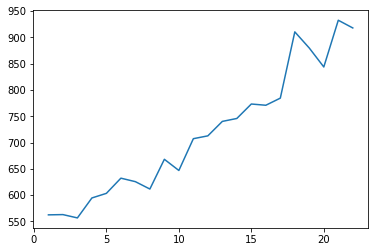

In [45]:
data.head(5)

,time,co2,delay,m1,m2,m3,temp,people
0,201905032031,689,3.437400,108,234,171,19,7
1,201904222024,785,5.180287,142,206,181,19,16
2,201904301744,764,4.932189,120,175,194,18,12
3,201904232058,665,5.651283,140,186,222,20,5
4,201905011817,874,4.313111,176,139,204,19,13


In [11]:
#x=data[['time','co2','delay','m1','m2','m3']]
x=data[['time','co2','delay']]
y=data['people']>=10


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [100]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
clf.fit(x_train, y_train)
print(clf.score(x_test,y_test))
predict=clf.predict(x_test)

0.9075144508670521


In [59]:

        
print (acc(predict,y_test))

0.8670520231213873


In [23]:
x=data[['time','co2','delay']]
y=data['people']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train,  y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
#y_test=np.array(y_test)
print(mean_squared_error(y_test, y_pred)**0.5)

3.106095538739938


In [30]:
x['time']

0      2031
1      2024
2      1744
3      2058
4      1817
5       945
6       126
7      1818
8      1433
9      2103
10     1654
11     1824
12     1922
13     2019
14     1639
15     1516
16     1659
17     1644
18     1556
19     1913
20     1942
21     1547
22     1908
23     1313
24     1447
25      919
26     1719
27     1923
28     1813
29     1802
       ... 
952    1926
953    1719
954    1518
955      46
956    1727
957    2200
958    1625
959    1342
960    1516
961    1226
962    1547
963    1059
964    1734
965    1749
966    1842
967    2156
968    1918
969      21
970    1928
971    1242
972    1734
973    1607
974    2051
975    1552
976     121
977    1639
978    1554
979    2121
980    1938
981    1617
Name: time, Length: 982, dtype: int64

In [29]:
x['time']=x['time']%10000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
x['time']=x['time']/100*60+x['time']%100


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
x

,time,co2,delay
0,1249.6,689,3.437400
1,1238.4,785,5.180287
2,1090.4,764,4.932189
3,1292.8,665,5.651283
4,1107.2,874,4.313111
5,612.0,531,13.273454
6,101.6,542,4.805613
7,1108.8,868,10.764885
8,892.8,609,5.349278
9,1264.8,668,5.136561


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train,  y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
#y_test=np.array(y_test)
print(mean_squared_error(y_test, y_pred)**0.5)

3.1508482963271653


In [36]:
print(y_pred[:10])
print(y_test[:10])

[12.23835309  5.38878249  5.50384823  3.93723179 17.26777534 10.58117267
 11.09620677  6.54753318 12.06168311  7.25757608]
630    13
236     7
961     3
846     2
739    17
585    14
771     7
896     4
828    13
99      5
Name: people, dtype: int64


Text(0, 0.5, 'count')

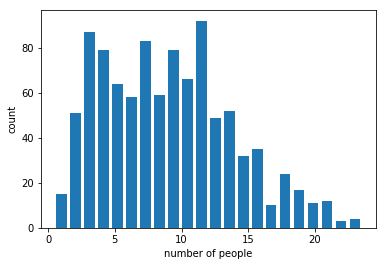

In [51]:
si=data.groupby('people').size()
si=np.array(si)
#len(si)
plt.bar(np.linspace(1,23,22),si)
plt.xlabel('number of people')
plt.ylabel('count')

In [46]:
data.head(5)







,time,co2,delay,m1,m2,m3,temp,people
0,201905032031,689,3.437400,108,234,171,19,7
1,201904222024,785,5.180287,142,206,181,19,16
2,201904301744,764,4.932189,120,175,194,18,12
3,201904232058,665,5.651283,140,186,222,20,5
4,201905011817,874,4.313111,176,139,204,19,13


In [61]:
data['time']=data['time']%10000
data['time']=data['time']/100*60+data['time']%100

In [49]:
data['time']=abs(data['time']-17*60)


data.head(5)

,time,co2,delay,m1,m2,m3,temp,people
0,229.6,689,3.437400,108,234,171,19,7
1,218.4,785,5.180287,142,206,181,19,16
2,70.4,764,4.932189,120,175,194,18,12
3,272.8,665,5.651283,140,186,222,20,5
4,87.2,874,4.313111,176,139,204,19,13


In [69]:
norma(data)
data.head(5)

,time,co2,delay,m1,m2,m3,temp,people
0,1.356156,0.266251,-0.657858,-1.031610,1.503371,-0.323522,0.522399,7
1,-0.828915,1.173864,-0.335283,-0.129242,0.877995,-0.098300,0.522399,16
2,-0.613863,0.975324,-0.381201,-0.713127,0.185616,0.194490,-0.417154,12
3,-0.801848,0.039348,-0.248110,-0.182322,0.431299,0.825113,1.461953,5
4,1.301626,2.015297,-0.495780,0.773126,-0.618438,0.419712,0.522399,13


In [77]:
data['time']=data['time']%10000
data['time']=data['time']/100*60+data['time']%100
norma(data)
x=data[['time','co2','delay','m1','m2','m3','temp']]
y=data['people']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train,  y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
#y_test=np.array(y_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(regr.coef_)

8.660164621132372
2.4017691807028645
[ 0.03984801  3.47505378  0.30646952 -0.09028706 -0.48759714 -0.3647337
  0.01089843]


In [95]:
data['time']=data['time']%10000
data['time']=data['time']/100*60+data['time']%100
data['time']=abs(data['time']-17*60)
norma(data)
x=data[['time','co2','delay']]
y=data['people']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train,  y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)
#y_test=np.array(y_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(regr.coef_)

7.403056520722226
2.1738076167855485
[1.11838544 3.02500149 0.26806054]


In [161]:


data['time']=data['time']%10000
data['time']=data['time']/100*60+data['time']%100
data['time']=abs(data['time']-17*60)

#norma(data)
x=data[['time','co2','delay']]
y=data['people']>=10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)



#predict=clf.predict(x_test)

In [136]:
ma=0

for i in range(1,302,10):
    for j in range(1,60):
        clf = RandomForestClassifier(n_estimators=i, max_depth=j,random_state=0)
        clf.fit(x_train, y_train)
        if clf.score(x_test,y_test)>ma:
            ma=clf.score(x_test,y_test)
            mi=i
            mj=j
print(ma)

0.8984771573604061


In [138]:
clf = RandomForestClassifier(n_estimators=mi, max_depth=mj,random_state=0)
clf.fit(x_train, y_train)
print(clf.score(x_test,y_test))
predict=clf.predict(x_test)
print(f1_score(predict,y_test))

0.8984771573604061
0.8333333333333333


In [153]:
clf = LogisticRegression( solver='liblinear')
clf.fit(x_train, y_train)
print(clf.score(x_test,y_test))
predict=clf.predict(x_test)
print(f1_score(predict,y_test))

0.7715736040609137
0.7019867549668874


In [162]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print(gnb.score(x_test,y_test))
predict=gnb.predict(x_test)
print(f1_score(predict,y_test))

0.751269035532995
0.6711409395973154
